<a href="https://colab.research.google.com/github/NasTiaFox30/ColabProjects/blob/master/Board_games_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gry planszowe🎲

---

Pewien serwis internetowy prowadzi ranking gier planszowych. Baza serwisu została zapisana w trzech plikach.

Plik `gry.txt` zawiera informacje o grach planszowych. W każdym wierszu zapisano:
- `id_gry` – unikatowy numer gry planszowej  
- `nazwa` – tytuł gry planszowej  
- `kategoria` – kategorię, do jakiej została zakwalifikowana gra planszowa (każda gra należy tylko do jednej kategorii)

**Przykład:**
```
id_gry	nazwa	                      kategoria
1	      Wsiasc do Pociagu: Europa	 familijna
2	      Pandemia	                  kooperacyjna
3	      Splendor	                  familijna
4	      Dixit	                     familijna
5	      Dobble	                    familijna
```

Plik `gracze.txt` zawiera informacje o graczach. W każdym wierszu zapisano:
- `id_gracza` – unikatowy numer gracza  
- `imie` – imię gracza  
- `nazwisko` – nazwisko gracza  
- `wiek` – wiek gracza

**Przykład:**
```
id_gracza	imie	      nazwisko	    wiek
1	        Jozef	      Gorecki	      29
2	        Przemyslaw	Mazurek	      68
3	        Cezary	    Kaczmarczyk	  41
4	        Kornel	    Wysocki	      72
5	        Eustachy	  Gorecki	      74
```

Plik `oceny.txt` zawiera oceny wystawione grom przez poszczególnych graczy. W każdym wierszu zapisano:
- `id_gry` – numer gry planszowej  
- `id_gracza` – numer gracza  
- `stan` – zawiera jedną z wartości: `posiada`, `chce kupic`, `sprzedal` – opisującą, czy użytkownik posiada daną grę, sprzedał ją lub zamierza ją kupić  
- `ocena` – ocena gry przez gracza, liczba całkowita od 0 do 10

**Przykład:**
```
id_gry	id_gracza	stan	      ocena
66	    1	        posiada	    8
72	    1	        chce kupic	3
79	    1	        sprzedal	  8
43	    2	        posiada	    9
```

📌 **Uwaga:**  
We wszystkich plikach dane w wierszach są **rozdzielone znakami tabulacji**, a **pierwszy wiersz w każdym pliku jest wierszem nagłówkowym**.

📄**Co do zrobienia?**

**Etap 1.** Połącz dane zawarte w trzech plikach w jędną ramkę danych Pandas

**Etap 2.** Utwórz wykres punktowy, kolumnowy lub histogram i mapę ciepła

**Etap 3.** Po analizie danych zdecyduj, czy przeprowadzisz klasyfikację, regeresję czy grupowanie

**Etap 4.** Budowa wybranego modelu, trenowanie, ocena i predykcja

# **Implementacja**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Pobieranie danych
df_gracze = pd.read_csv('gracze.txt', sep='\t')
df_gry = pd.read_csv('gry.txt', sep='\t')
df_oceny = pd.read_csv('oceny.txt', sep='\t')

In [ ]:
# 1. Łączenie danych
_dane = pd.merge(df_gracze, df_oceny, on='id_gracza')
_dane = pd.merge(_dane, df_gry, on='id_gry')


print("\nDane po łączeniu:")
print(_dane.head())


Dane po łączeniu:
   id_gracza        imie nazwisko  wiek  id_gry        stan  ocena  \
0          1       Jozef  Gorecki    29      66     posiada      8   
1          1       Jozef  Gorecki    29      72  chce kupic      3   
2          1       Jozef  Gorecki    29      79    sprzedal      8   
3          2  Przemyslaw  Mazurek    68      43     posiada      9   
4          2  Przemyslaw  Mazurek    68      45  chce kupic      7   

          nazwa     kategoria  
0      Dominion  strategiczna  
1        Bukiet     familijna  
2  Wielka Petla     familijna  
3       Simurgh  strategiczna  
4     Patchwork     familijna  


In [ ]:
# Sprawdzenie na wartosci NaN
_dane.isnull().sum()

#Nie ma pustych wartości w wyniku

,0
id_gracza,0
imie,0
nazwisko,0
wiek,0
id_gry,0
stan,0
ocena,0
nazwa,0
kategoria,0


## **Wykresy**

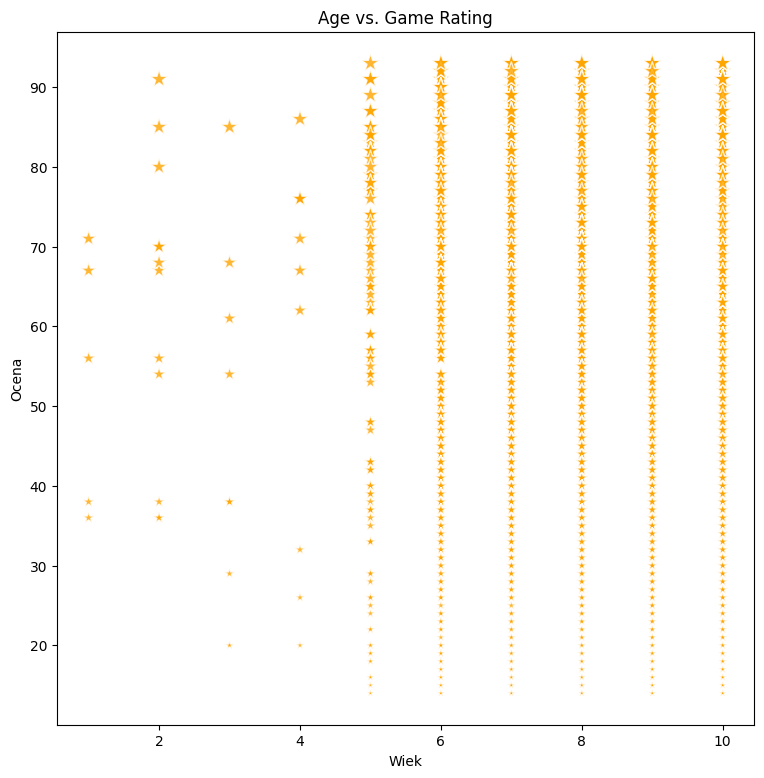

In [ ]:
# Punktowy wykres
plt.figure(figsize=(9, 9))
plt.scatter(_dane['ocena'], _dane['wiek'],
            c='orange',
            marker="*",
            s=_dane['wiek']*2,
            alpha=0.8, edgecolor='white')
plt.title('Age vs. Game Rating')
plt.xlabel('Wiek')
plt.ylabel('Ocena')
plt.title('Age vs. Game Rating')
plt.show()

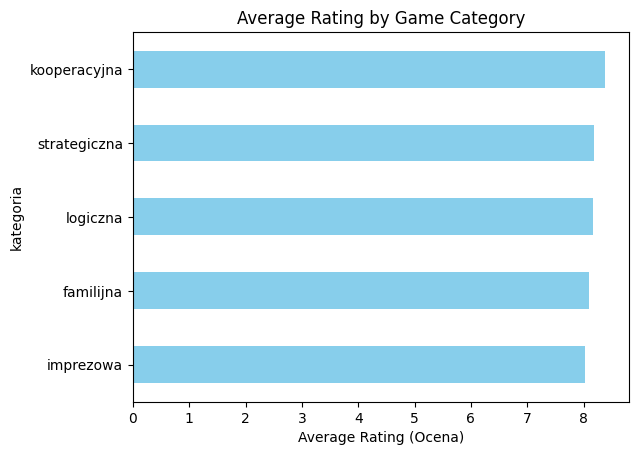

In [ ]:
# Srednia ocena gier za ich kategorią
avg_ratings = _dane.groupby('kategoria')['ocena'].mean().sort_values()
avg_ratings.plot(kind='barh', color="skyblue")
plt.title('Average Rating by Game Category')
plt.xlabel('Average Rating (Ocena)')
plt.show()

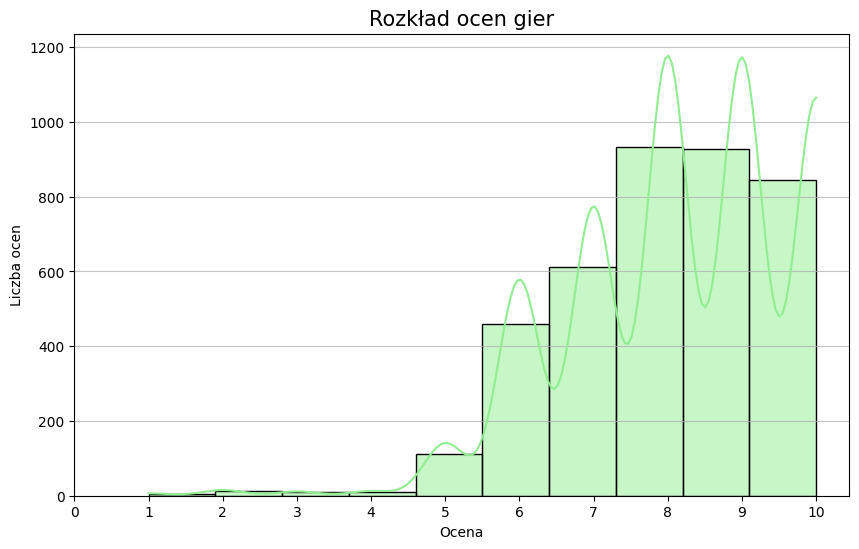

In [ ]:
# Histogram ocen gier
plt.figure(figsize=(10, 6))
sns.histplot(_dane['ocena'], bins=10, color='lightgreen', edgecolor='black', kde=True)
plt.title('Rozkład ocen gier', fontsize=15)
plt.xlabel('Ocena')
plt.ylabel('Liczba ocen')
plt.xticks(range(11))
plt.grid(axis='y', alpha=0.75)
plt.show()

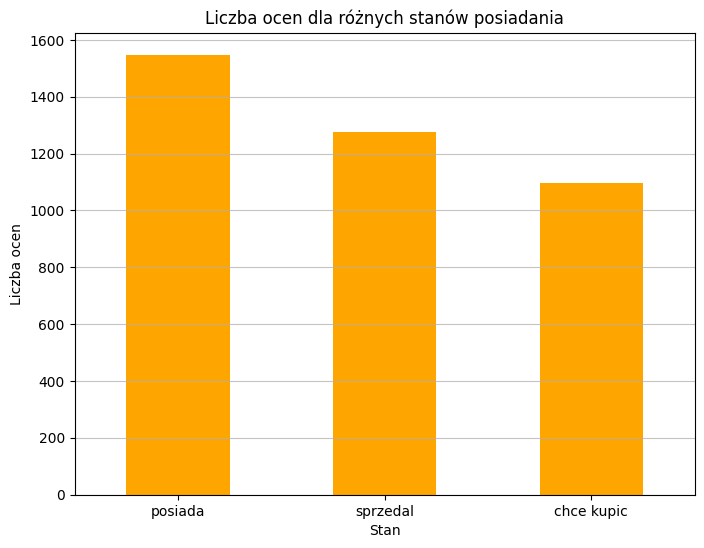

In [ ]:
# Wykres kolumnowy liczby ocen w zależności od stanu posiadania
stan_counts = _dane['stan'].value_counts()
plt.figure(figsize=(8, 6))
stan_counts.plot(kind='bar', color='orange')
plt.title('Liczba ocen dla różnych stanów posiadania')
plt.xlabel('Stan')
plt.ylabel('Liczba ocen')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

<ipython-input-9-4564cde1747d>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  summ_table = _dane.pivot_table(values='ocena', index='kategoria', columns='wiek_grupa', aggfunc='mean')


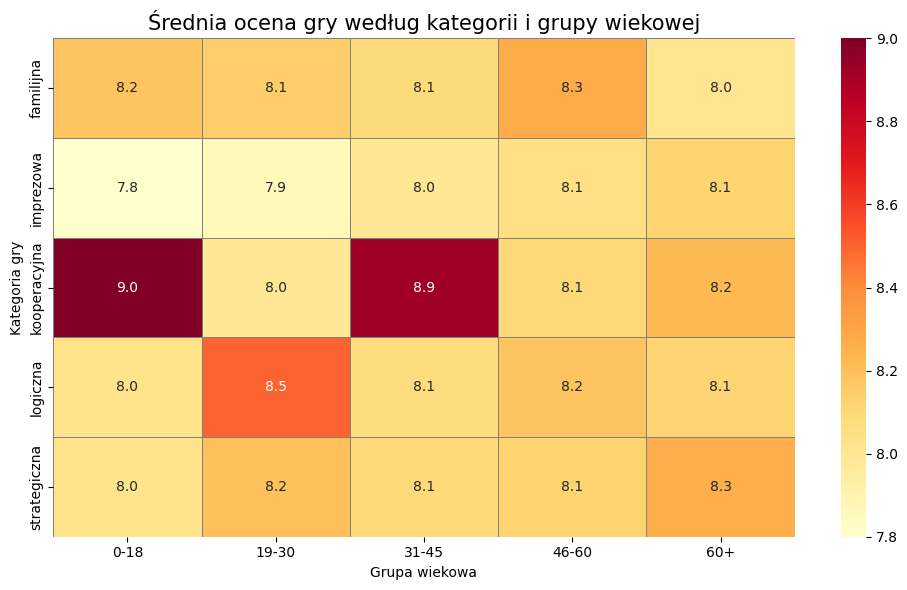

In [ ]:
# Tworzenie grup wiekowych
# 0-18, 19-30, 31-45, 46-60, 60+

_dane['wiek_grupa'] = pd.cut(_dane['wiek'],
                             bins=[0, 18, 30, 45, 60, 100],
                             labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Stwórzmy tabelę podsumowującą: średnią ocenę według kategorii gry i grupy wiekowej
summ_table = _dane.pivot_table(values='ocena', index='kategoria', columns='wiek_grupa', aggfunc='mean')

# Tworzenie heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(summ_table, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Średnia ocena gry według kategorii i grupy wiekowej", fontsize=15)
plt.xlabel("Grupa wiekowa")
plt.ylabel("Kategoria gry")
plt.tight_layout()
plt.show()

### **Korelacja danych**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = _dane.copy()


le = LabelEncoder()
df_encoded['stan_encoded'] = le.fit_transform(_dane['stan'])
df_encoded['kategoria_encoded'] = le.fit_transform(_dane['kategoria'])

# print(df_encoded[['stan', 'kategoria']].head())
print(df_encoded[['stan', 'stan_encoded', 'kategoria', 'kategoria_encoded']].head())

         stan  stan_encoded     kategoria  kategoria_encoded
0     posiada             1  strategiczna                  4
1  chce kupic             0     familijna                  0
2    sprzedal             2     familijna                  0
3     posiada             1  strategiczna                  4
4  chce kupic             0     familijna                  0


<Axes: >

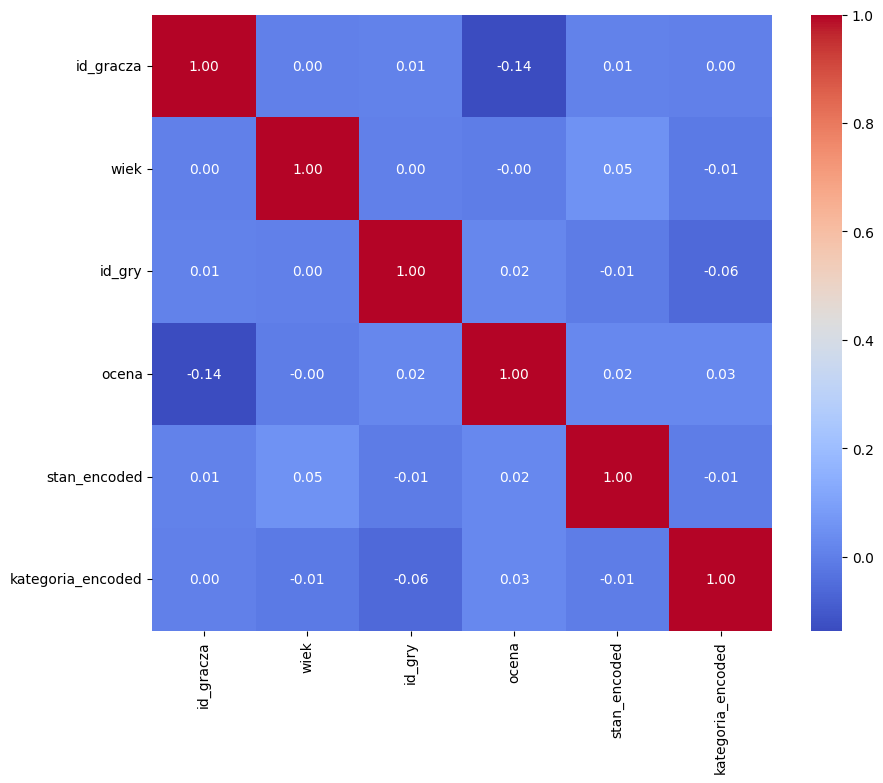

In [ ]:
df_encoded.drop(['imie', 'nazwisko'], axis=1)

macierz_korelacji = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(macierz_korelacji, annot=True, cmap='coolwarm', fmt=".2f")

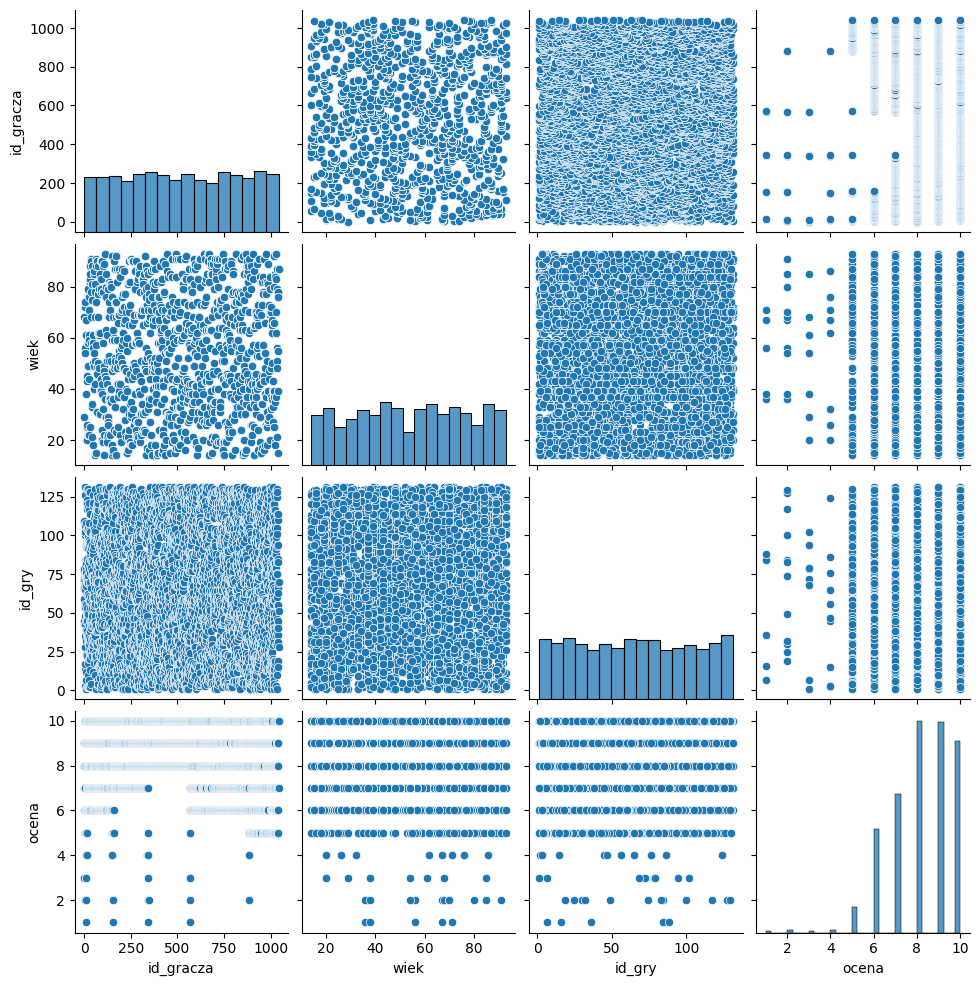

In [ ]:
# Róźne wykresy
sns.pairplot(_dane)

## **Analiza Regresja**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Cel - przewidzeć ocene gry na podstawie wieku i kategorii

# Definiowanie cech (X) i zmiennej docelowej (y)
X = _dane[['wiek', 'kategoria']]
y = _dane['ocena']

# Przygotowanie transformatora dla 'kategoria'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['kategoria'])],
    remainder='passthrough')

# Dopasowanie i transformacja danych X
X_processed = preprocessor.fit_transform(X)

In [ ]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
# Budowa i trenowanie modelu
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Ocena modelu

# Predykcja
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Średni błąd kwadratowy (MSE) na zbiorze testowym: {mse:.2f}')
print(f'Współczynnik determinacji (R²) na zbiorze testowym: {r2:.2f}')

Średni błąd kwadratowy (MSE) na zbiorze testowym: 2.40
Współczynnik determinacji (R²) na zbiorze testowym: -0.00



R^2 wynosi 0, oznacza to, że model nie przewiduje wartości wynikowe lepiej niż po prostu używanie średniej wartości tych wyników. Innymi słowy, model nie pasuje dobrze do danych.

In [ ]:
# Przykładowa predykcja dla nowego gracza i kategorii gry
nowy_gracz = pd.DataFrame({
    'wiek': [30], 'kategoria': ["strategiczna"]
    })
nowy_gracz_processed = preprocessor.transform(nowy_gracz)
# nowy_gracz_processed = nowy_gracz

przewidywana_ocena = model.predict(nowy_gracz_processed)[0]
print(f'\nPrzewidywana ocena dla gracza w wieku 30 lat, zainteresowanego grami strategicznymi: {przewidywana_ocena:.2f}')

nowy_gracz_familijna = pd.DataFrame({'wiek': [25], 'kategoria': ['familijna']})
nowy_gracz_familijna_processed = preprocessor.transform(nowy_gracz_familijna)
przewidywana_ocena_familijna = model.predict(nowy_gracz_familijna_processed)[0]
print(f'Przewidywana ocena dla gracza w wieku 25 lat, zainteresowanego grami familijnymi: {przewidywana_ocena_familijna:.2f}')


Przewidywana ocena dla gracza w wieku 30 lat, zainteresowanego grami strategicznymi: 8.13
Przewidywana ocena dla gracza w wieku 25 lat, zainteresowanego grami familijnymi: 8.10


### *Regresja wielomianowa*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Ocena modelu

# Przewidzenie
y_pred = poly_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Średni błąd kwadratowy (MSE) na zbiorze testowym: {mse:.2f}')
print(f'Współczynnik determinacji (R²) na zbiorze testowym: {r2:.2f}')


Średni błąd kwadratowy (MSE) na zbiorze testowym: 2.39
Współczynnik determinacji (R²) na zbiorze testowym: -0.00


R^2 < 0 - model jest najgorszy

### *Drzewo dycyzyjne*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Cel - przewidzeć ocene gry na podstawie wieku i kategorii

# Definiowanie cech (X) i zmiennej docelowej (y)
X = _dane[['wiek', 'kategoria']]
y = _dane['ocena']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['kategoria']),
        ('num', StandardScaler(), ['wiek'])
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

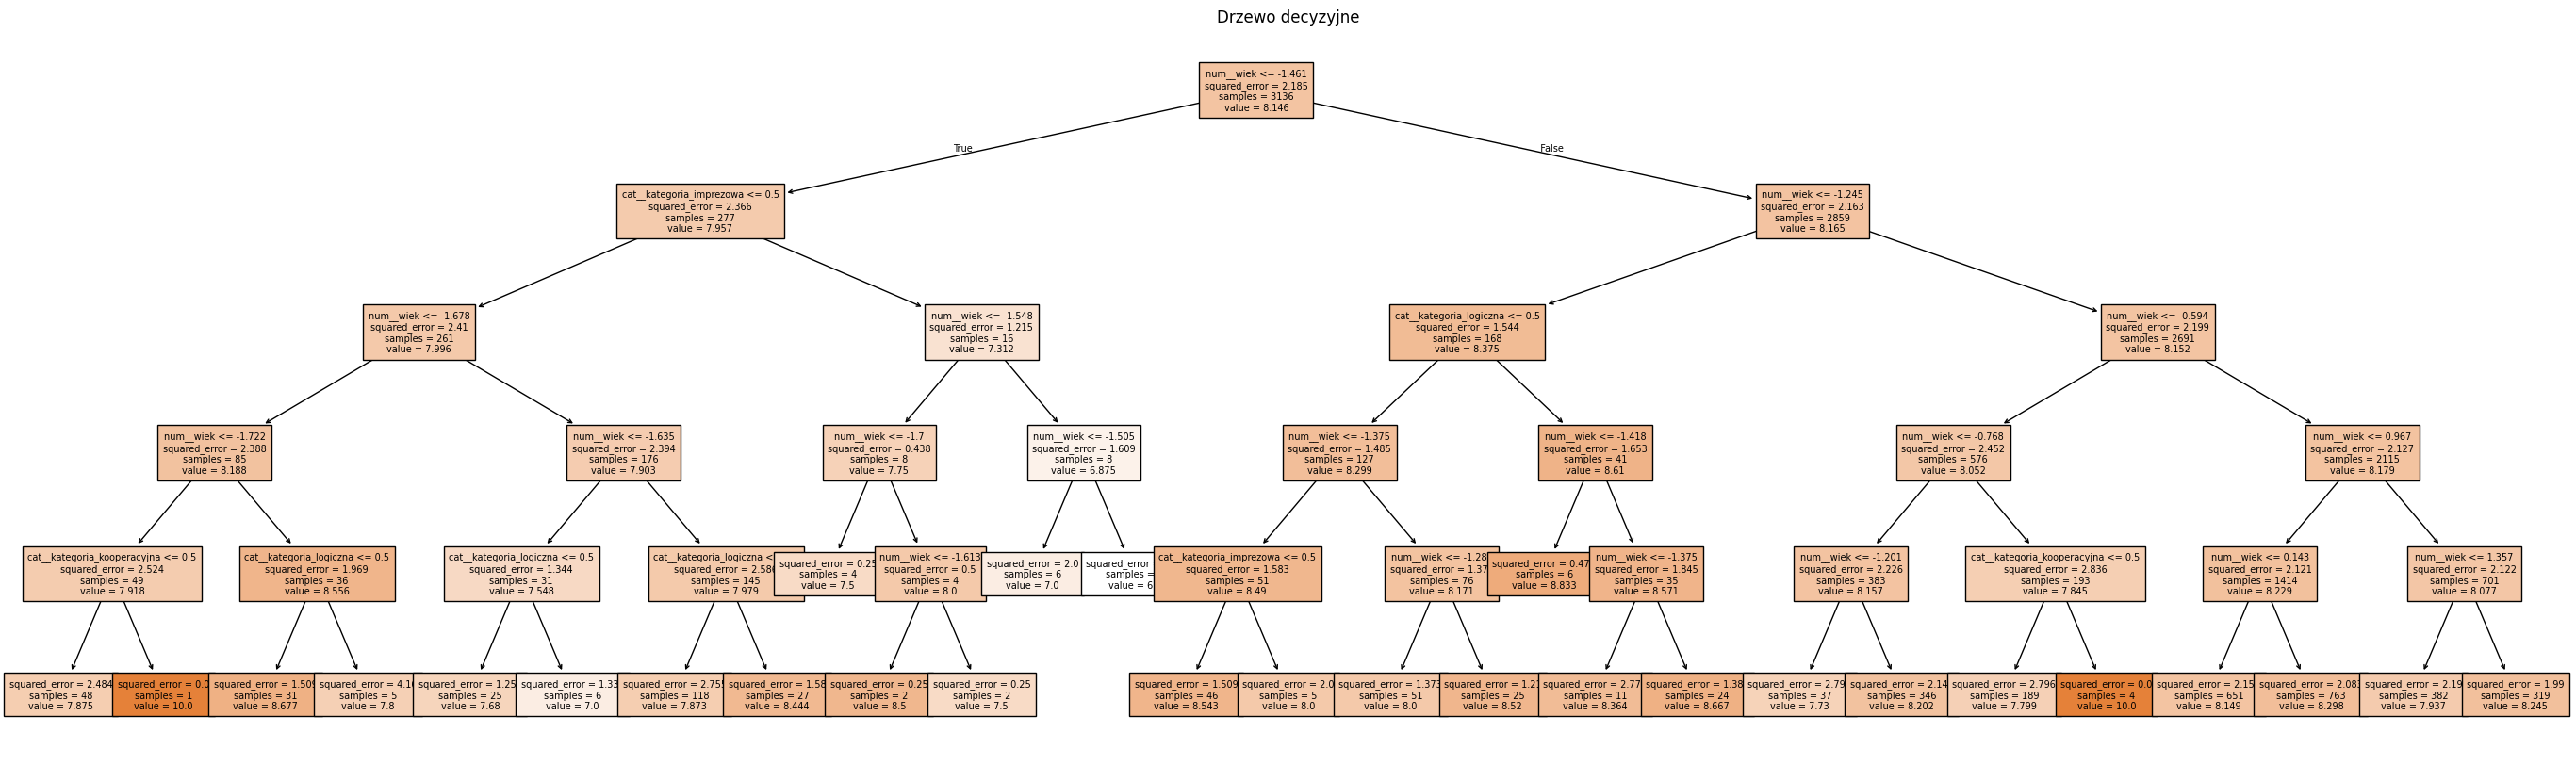

In [ ]:
# Wizualizacja
from sklearn.tree import plot_tree

plt.figure(figsize=(35, 10))
plot_tree(tree_model, feature_names=preprocessor.get_feature_names_out(), filled=True,fontsize=7)
plt.title('Drzewo decyzyjne')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Ocena modelu

# Przewidzenie
y_pred = tree_model.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Średni błąd kwadratowy (MSE) na zbiorze testowym: {mse:.2f}')
print(f'Współczynnik determinacji (R²) na zbiorze testowym: {r2:.2f}')

Średni błąd kwadratowy (MSE) na zbiorze testowym: 2.45
Współczynnik determinacji (R²) na zbiorze testowym: -0.02


## **Analiza Klasyfikacja**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
df_encoded = _dane.copy()

# kodowanie - 'stan'
le = LabelEncoder()
df_encoded['stan'] = le.fit_transform(_dane['stan'])

# kodowanie - 'kategoria' za pomocą OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['kategoria']),
    ],
    remainder='passthrough'
)

In [ ]:
X = df_encoded[['wiek', 'id_gry', 'ocena', 'kategoria']]
y = df_encoded['stan']

# Przekształcamy
X_processed = preprocessor.fit_transform(X)

# Podział na trenowane i testowe dane
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

### *RandomForestClassifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Cel - przewidzieć stan posiadania gry na podstawie wieku, oceny i kategorii gry

model_rdclassif = RandomForestClassifier(n_estimators=200, random_state=42)
model_rdclassif.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

Accuracy: 0.36
Classification Raport: 
              precision    recall  f1-score   support

           0       0.35      0.32      0.34       232
           1       0.40      0.43      0.42       309
           2       0.33      0.32      0.32       244

    accuracy                           0.36       785
   macro avg       0.36      0.36      0.36       785
weighted avg       0.36      0.36      0.36       785

Confusion Matrix:
[[ 75  89  68]
 [ 85 134  90]
 [ 55 112  77]]


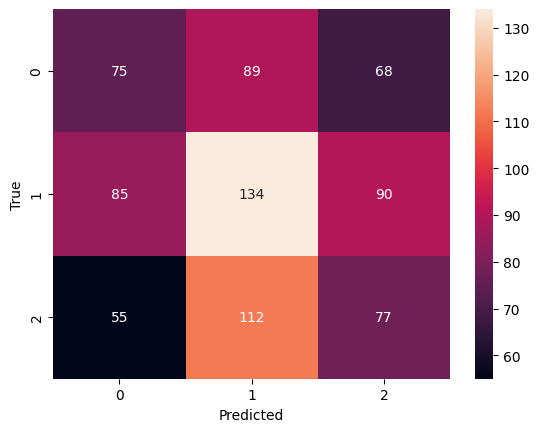

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Ocena modelu

# Przewidzenie
y_pred = model_rdclassif.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print(f'Classification Raport: \n{classification_report(y_test, y_pred)}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# wizualizacja Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### *LogisticRegression*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(solver="liblinear")
model_logreg.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

Accuracy: 0.39
Classification Raport: 
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       232
           1       0.40      0.93      0.56       309
           2       0.29      0.07      0.11       244

    accuracy                           0.39       785
   macro avg       0.45      0.34      0.23       785
weighted avg       0.44      0.39      0.26       785

Confusion Matrix:
[[  2 210  20]
 [  0 288  21]
 [  1 226  17]]


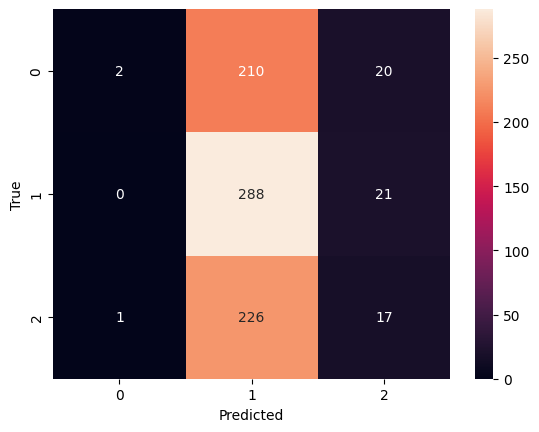

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Ocena modelu

# Przewidzenie
y_pred = model_logreg.predict(X_test_scaled)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print(f'Classification Raport: \n{classification_report(y_test, y_pred)}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# wizualizacja Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### *KNeighborsClassifier*

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Accuracy: 0.35
Classification Raport: 
              precision    recall  f1-score   support

           0       0.32      0.41      0.36       232
           1       0.39      0.41      0.40       309
           2       0.30      0.20      0.24       244

    accuracy                           0.35       785
   macro avg       0.34      0.34      0.33       785
weighted avg       0.34      0.35      0.34       785

Confusion Matrix:
[[ 94  86  52]
 [118 128  63]
 [ 79 116  49]]


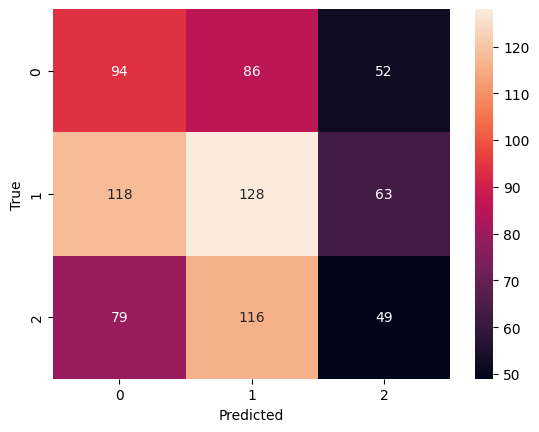

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Ocena modelu

# Przewidzenie
y_pred = model_knn.predict(X_test_scaled)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print(f'Classification Raport: \n{classification_report(y_test, y_pred)}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# wizualizacja Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **Alaliza Klasteryzacji**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


# Tworzenie macierzy ocen (gry jako indeks, gracze jako kolumny)
pivot_table = _dane.pivot_table(index='nazwa', columns='id_gracza', values='ocena')

# Obsługa brakujących ocen (NaN) - wypełniamy średnią oceną dla danej gry
imputer = SimpleImputer(strategy='mean')
game_ratings_imputed = imputer.fit_transform(pivot_table)
game_ratings_df = pd.DataFrame(game_ratings_imputed, index=pivot_table.index, columns=pivot_table.columns)

# Skalowanie danych
scaler = StandardScaler()
scaled_ratings = scaler.fit_transform(game_ratings_df)
scaled_ratings_df = pd.DataFrame(scaled_ratings, index=game_ratings_df.index, columns=game_ratings_df.columns)



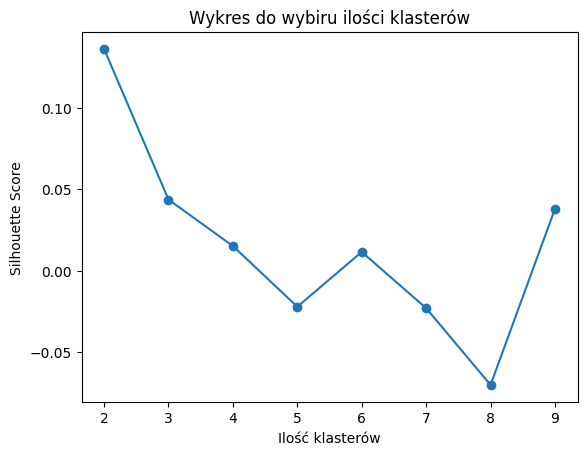

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_ratings_df)
    score = silhouette_score(scaled_ratings_df, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Ilość klasterów')
plt.ylabel('Silhouette Score')
plt.title('Wykres do wybiru ilości klasterów')
plt.show()

Niech będzie ilość klasterów - 4 lub 6

In [ ]:
# Wybór liczby klastrów
n_clusters = 6

# K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)

clusters = kmeans.fit_predict(scaled_ratings_df)

# Redukcja wymiarowości do 2 za pomocą PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_ratings_df)
pca_df = pd.DataFrame(data=principal_components, index=scaled_ratings_df.index, columns=['PC1', 'PC2'])
pca_df['klaster'] = clusters

<ipython-input-36-9fba772576d9>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=pca_df.PC1[i], y=pca_df.PC2[i], s=pca_df.index[i],


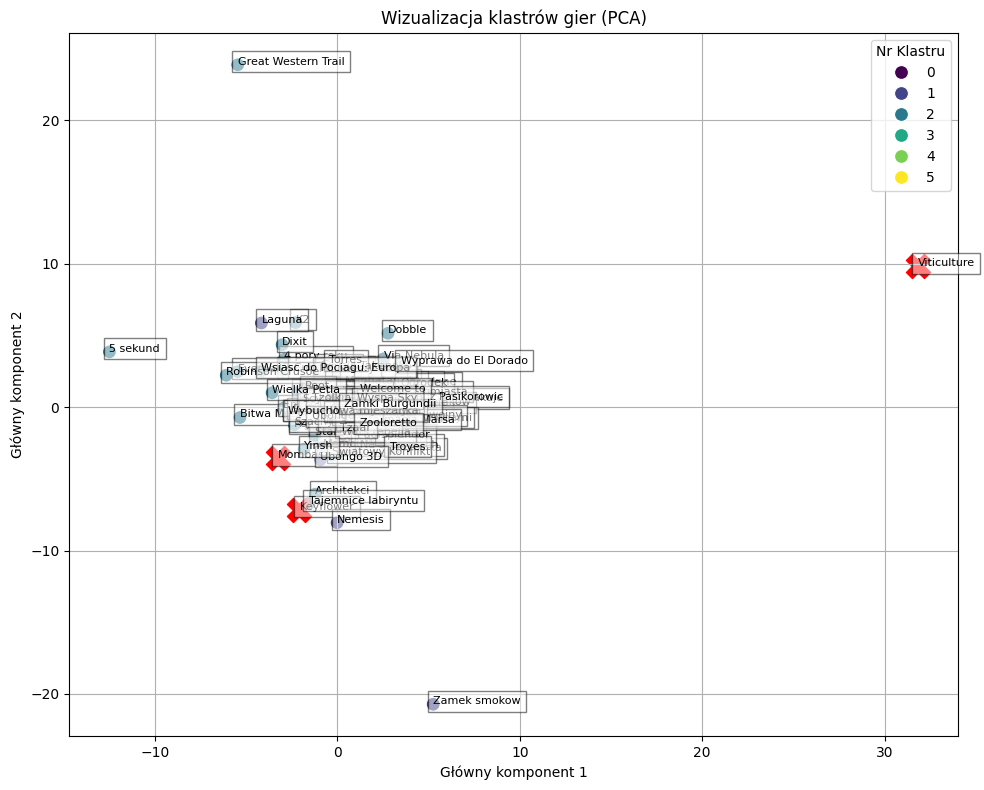

In [ ]:
# Wizualizacja 2D:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='klaster', data=pca_df, palette='viridis', s=100)


# Dodanie nazw gier do punktów
for i in range(pca_df.shape[0]):
    plt.text(x=pca_df.PC1[i], y=pca_df.PC2[i], s=pca_df.index[i],
              fontdict=dict(color='black', size=8),
              bbox=dict(facecolor='white', alpha=0.5))

plt.title('Wizualizacja klastrów gier (PCA)')
plt.xlabel('Główny komponent 1')
plt.ylabel('Główny komponent 2')
plt.legend(title='Nr Klastru')

# Centroidy
centroidy = pca.transform(kmeans.cluster_centers_)
plt.scatter(
	centroidy[:,0],
	centroidy[:,1],
	marker="X",
	c="red",
  s=300,
 label="Centroidy"
)


plt.grid(True)
plt.tight_layout()
plt.show()

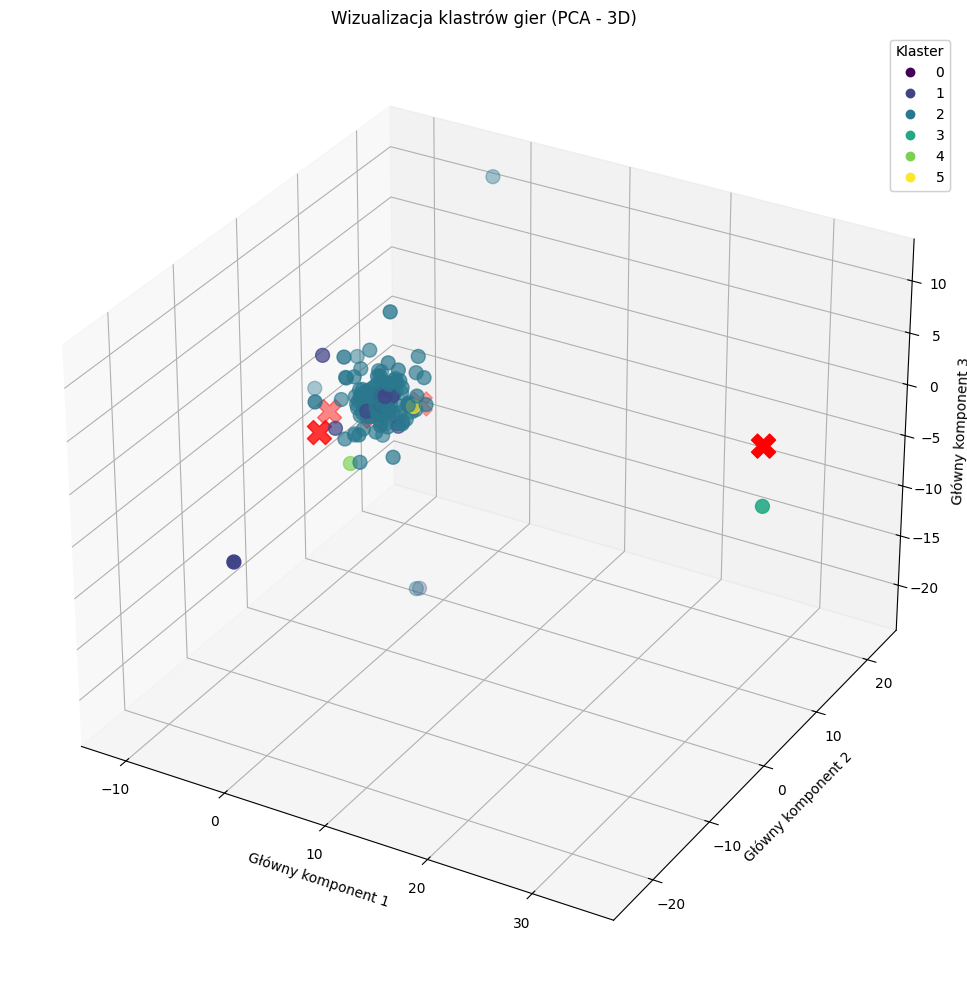

In [ ]:
# wizualizacja 3D:
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_ratings_df)
pca_df_3d = pd.DataFrame(data=principal_components_3d, index=scaled_ratings_df.index, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['klaster'] = clusters

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['klaster'], cmap='viridis', s=100)


ax.set_xlabel('Główny komponent 1')
ax.set_ylabel('Główny komponent 2')
ax.set_zlabel('Główny komponent 3')
ax.set_title('Wizualizacja klastrów gier (PCA - 3D)')

# Centroidy
centroidy = pca.transform(kmeans.cluster_centers_)
plt.scatter(
	centroidy[:,0],
	centroidy[:,1],
	marker="X",
	c="red",
  s=300,
  label="Centroidy"
)

# Dodanie legendy
legend1 = ax.legend(*scatter.legend_elements(), title="Klaster")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()